In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import regularizers
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
tf.config.run_functions_eagerly(True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ppi = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ppi_human.txt', sep = '\t')
print(len(ppi))
ppi.head()

315934


,Protein_A_idx,Protein_B_idx,Interaction,Uniprot_A,Uniprot_B
0,11777,537,0.045,Q9HCE7,Q9BYM8
1,11777,5865,0.508,Q9HCE7,P51668
2,11777,10925,0.080,Q9HCE7,P17844
3,11777,6695,0.156,Q9HCE7,P38646
4,11777,4966,0.264,Q9HCE7,Q9H469


In [ ]:
ppi['Interaction'] = (ppi['Interaction'] > 0).astype(int)
ppi.head()

,Protein_A_idx,Protein_B_idx,Interaction,Uniprot_A,Uniprot_B
0,11777,537,1,Q9HCE7,Q9BYM8
1,11777,5865,1,Q9HCE7,P51668
2,11777,10925,1,Q9HCE7,P17844
3,11777,6695,1,Q9HCE7,P38646
4,11777,4966,1,Q9HCE7,Q9H469


In [ ]:
num_of_protein_A = len(ppi['Protein_A_idx'].unique())
num_of_protein_B = len(ppi['Protein_B_idx'].unique())

In [ ]:
info = pd.read_csv('/content/drive/My Drive/Colab Notebooks/protein_information.txt', sep = '\t')
print(len(info))
info.head()

14407


,Index,Uniprot_ID,Protein_names,Length,Organism_ID,Gene_name,Subcellular_location,GO(CC),Tissue_specificity,GeneID,PDB,Degree,mean_score_top_10_pred
0,0,Q8TBF5,Phosphatidylinositol-glycan biosynthesis class...,258,9606,PIGX,Endoplasmic reticulum membrane {ECO:0000250}; ...,endoplasmic reticulum membrane [GO:0005789]; i...,NaN,54965;,NA;,1,0.865861
1,1,Q8TBF4,Zinc finger CCHC-type and RNA-binding motif-co...,217,9606,ZCRB1,"Nucleus, nucleoplasm {ECO:0000269|PubMed:15146...",nucleoplasm [GO:0005654]; U12-type spliceosoma...,NaN,85437;,2E5H;,55,0.989386
2,2,Q5MIZ7,Serine/threonine-protein phosphatase 4 regulat...,849,9606,PPP4R3B,Cytoplasm {ECO:0000269|PubMed:18487071}. Cytop...,centrosome [GO:0005813]; cytoplasm [GO:0005737...,Moderately expressed in tissues and specific b...,57223;,NA;,27,0.987056
3,3,Q9NVL8,Uncharacterized protein CCDC198,296,9606,CCDC198,NaN,NaN,NaN,55195;,NA;,4,0.923086
4,4,Q8TBF2,Prostamide/prostaglandin F synthase (Prostamid...,198,9606,PRXL2B,"Cytoplasm, cytosol {ECO:0000250|UniProtKB:Q9DB...",cytoplasm [GO:0005737]; cytosol [GO:0005829]; ...,NaN,127281;,NA;,5,0.953029


In [ ]:
subcellular_location_dict = {k:v for k, v in zip(info['Index'],info['GO(CC)'])}

In [ ]:
ppi['Protein_A_location'] = ppi['Interaction']
ppi['Protein_B_location'] = ppi['Interaction']
for i in range(len(ppi)):
 if subcellular_location_dict[ppi['Protein_A_idx'][i]] == 'nan':
   ppi['Protein_A_location'][i] = 'unknown'
 else:
   ppi['Protein_A_location'][i] = (str(subcellular_location_dict[ppi['Protein_A_idx'][i]]).split('['))[0]
 if subcellular_location_dict[ppi['Protein_B_idx'][i]] == 'nan':
   ppi['Protein_B_location'][i] = 'unknown'
 else: 
   ppi['Protein_B_location'][i] = (str(subcellular_location_dict[ppi['Protein_B_idx'][i]]).split('['))[0]
ppi.head(100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp

,Protein_A_idx,Protein_B_idx,Interaction,Uniprot_A,Uniprot_B,Protein_A_location,Protein_B_location
0,11777,537,1,Q9HCE7,Q9BYM8,axon,cytosol
1,11777,5865,1,Q9HCE7,P51668,axon,cytoplasm
2,11777,10925,1,Q9HCE7,P17844,axon,catalytic step 2 spliceosome
3,11777,6695,1,Q9HCE7,P38646,axon,cytoplasm
4,11777,4966,1,Q9HCE7,Q9H469,axon,cytoplasm
...,...,...,...,...,...,...,...
95,11777,14195,1,Q9HCE7,Q9UKA1,axon,cell
96,11777,8354,1,Q9HCE7,O15165,axon,early endosome membrane
97,11777,9685,1,Q9HCE7,Q8N0X7,axon,cytoplasm
98,11777,7622,1,Q9HCE7,O76024,axon,dendrite


In [ ]:
positive_list = []
negative_list = []
for i in range(len(ppi)):
  if ppi['Interaction'][i] == 1: 
    positive_list.append(i)
  else:
    negative_list.append(i)
print(len(positive_list), len(negative_list))

157967 157967


In [ ]:
import random
new_positive_list = random.sample(positive_list,8000)
new_negative_list = random.sample(negative_list,2000)
new_idx = new_positive_list + new_negative_list

df = pd.DataFrame()
df['Protein_A_idx'] = ppi['Protein_A_idx'][new_idx]
df['Protein_B_idx'] = ppi['Protein_B_idx'][new_idx]
df['Protein_A_location'] = ppi['Protein_A_location'][new_idx]
df['Protein_B_location'] = ppi['Protein_B_location'][new_idx]
df['Interaction'] = ppi['Interaction'][new_idx]
df

,Protein_A_idx,Protein_B_idx,Protein_A_location,Protein_B_location,Interaction
122143,3416,13794,cell projection,anaphase-promoting complex,1
77003,7249,9922,cytosol,U1 snRNP,1
92686,6729,1395,cytoplasm,nan,1
19393,10851,7636,cleavage body,condensed chromosome kinetochore,1
38901,7834,11297,cell,nan,1
...,...,...,...,...,...
304438,4005,8211,cytoplasm,nucleus,0
280683,6669,7369,nan,condensed chromosome outer kinetochore,0
294970,3487,4221,cytoplasm,clathrin-coated vesicle membrane,0
183044,11324,12426,axon,clathrin adaptor complex,0


In [ ]:
positive_proteins = set()
negative_proteins = set()
for i in range(len(df)):
  if df['Interaction'].values[i] == 1:
    positive_proteins.add((df['Protein_A_idx'].values[i], df['Protein_B_idx'].values[i]))
  else:
    negative_proteins.add((df['Protein_A_idx'].values[i], df['Protein_B_idx'].values[i]))

In [ ]:
proteins_frequency = {}
for i in range(len(df)):
  if df['Protein_A_idx'].values[i] in proteins_frequency:
    proteins_frequency[df['Protein_A_idx'].values[i]] += 1
  else:
    proteins_frequency[df['Protein_A_idx'].values[i]] = 1
  if df['Protein_B_idx'].values[i] in proteins_frequency:
    proteins_frequency[df['Protein_B_idx'].values[i]] += 1
  else:
    proteins_frequency[df['Protein_B_idx'].values[i]] = 1

In [ ]:
negative_sampling = []
for idx1 in set(df['Protein_A_idx'].values):
  for idx2  in set(df['Protein_B_idx'].values):
    location1 = ""
    location2 = ""
    if subcellular_location_dict[idx1] == 'nan':
      location1 = 'unknown'
    else:
      location1 = (str(subcellular_location_dict[idx1]).split('['))[0]
    if subcellular_location_dict[idx2] == 'nan':
      location2 = 'unknown'
    else: 
      location2 = (str(subcellular_location_dict[idx2]).split('['))[0]
    if idx1 != idx2 and (idx1, idx2) not in positive_proteins and (idx1, idx2) not in negative_proteins and location1 != location2: 
      frequency = int(proteins_frequency[idx1]**(0.75) + proteins_frequency[idx2]**(0.75))
      negative_sampling += [(idx1,idx2)] * frequency
      negative_proteins.add((idx1, idx2))
print(len(negative_sampling))


101547430


In [ ]:
df2 = pd.DataFrame()
df2['Protein_A_idx'] = df['Protein_A_idx']
df2['Protein_B_idx'] = df['Protein_B_idx']
df2['Protein_A_location'] = df['Protein_A_location']
df2['Protein_B_location'] = df['Protein_B_location']
df2['Interaction'] = df['Interaction']
df2

,Protein_A_idx,Protein_B_idx,Protein_A_location,Protein_B_location,Interaction
122143,3416,13794,cell projection,anaphase-promoting complex,1
77003,7249,9922,cytosol,U1 snRNP,1
92686,6729,1395,cytoplasm,nan,1
19393,10851,7636,cleavage body,condensed chromosome kinetochore,1
38901,7834,11297,cell,nan,1
...,...,...,...,...,...
304438,4005,8211,cytoplasm,nucleus,0
280683,6669,7369,nan,condensed chromosome outer kinetochore,0
294970,3487,4221,cytoplasm,clathrin-coated vesicle membrane,0
183044,11324,12426,axon,clathrin adaptor complex,0


In [ ]:
negative_samples_set = set()
negative_samples = list()

i = 0
while i < 6000:
  temp =  random.sample(negative_sampling, 1)
  if temp[0] in negative_samples_set:
    continue
  negative_samples.append(temp[0])
  negative_samples_set.add(temp[0])
  i += 1

In [ ]:
for i in range(6000):
  location1 = ""
  location2 = ""
  if subcellular_location_dict[negative_samples[i][0]] == 'nan':
    location1 = 'unknown'
  else:
    location1 = (str(subcellular_location_dict[negative_samples[i][0]]).split('['))[0]
  if subcellular_location_dict[negative_samples[i][1]] == 'nan':
    location2 = 'unknown'
  else: 
    location2 = (str(subcellular_location_dict[negative_samples[i][1]]).split('['))[0]

  df2 = df2.append({'Protein_A_idx' : negative_samples[i][0] , 'Protein_B_idx' : negative_samples[i][1], 'Protein_A_location' : location1 , 'Protein_B_location': location2,'Interaction' : 0} , ignore_index=True)
df2

,Protein_A_idx,Protein_B_idx,Protein_A_location,Protein_B_location,Interaction
0,3416,13794,cell projection,anaphase-promoting complex,1
1,7249,9922,cytosol,U1 snRNP,1
2,6729,1395,cytoplasm,nan,1
3,10851,7636,cleavage body,condensed chromosome kinetochore,1
4,7834,11297,cell,nan,1
...,...,...,...,...,...
15995,9492,4861,chromatin,cytoplasm,0
15996,5472,6414,chromosome,integral component of membrane,0
15997,194,11224,ciliary base,centrosome,0
15998,4010,9427,extracellular region,cell periphery,0


In [ ]:
df2.describe()

,Protein_A_idx,Protein_B_idx,Interaction
count,16000.000000,16000.000000,16000.000000
mean,7084.750750,7846.742812,0.500000
std,4169.777522,4213.757309,0.500016
min,1.000000,1.000000,0.000000
25%,3469.000000,4198.250000,0.000000
50%,6956.000000,8211.000000,0.500000
75%,10847.250000,11605.000000,1.000000
max,14402.000000,14406.000000,1.000000


In [ ]:
def compile_model(num_of_user, num_of_item, learning_rate = 0.001):
  VECTOR_DIMENSION = 8

  protein_A_input = keras.layers.Input((1,))
  protein_A_embedding = keras.layers.Embedding(num_of_protein_A, VECTOR_DIMENSION, input_length = 1, name = 'protein_A_embedding', embeddings_initializer = 'he_normal',  embeddings_regularizer=regularizers.L2(1e-4))
  protein_A = protein_A_embedding(protein_A_input)
  protein_A = keras.layers.Reshape((VECTOR_DIMENSION, 1))(protein_A)

  protein_A_bias = keras.layers.Embedding(num_of_protein_A, 1, embeddings_initializer = 'he_normal', embeddings_regularizer=regularizers.L2(1e-4))
  protein_A_b = protein_A_bias(protein_A_input)
  protein_A_b = keras.layers.Reshape((1,))(protein_A_b)

  protein_B_input = keras.layers.Input((1,))
  protein_B_embedding = keras.layers.Embedding(num_of_protein_B, VECTOR_DIMENSION, input_length = 1, name = 'protein_B_embedding', embeddings_initializer = 'he_normal',  embeddings_regularizer=regularizers.L2(1e-4))
  protein_B = protein_B_embedding(protein_B_input)
  protein_B = keras.layers.Reshape((VECTOR_DIMENSION, 1))(protein_B)

  protein_B_b = protein_A_bias(protein_B_input)
  protein_B_b = keras.layers.Reshape((1,))(protein_B_b)

  protein_A_location_input = keras.layers.Input((1,))
  protein_A_location_embedding = keras.layers.Embedding(num_of_protein_A, VECTOR_DIMENSION, input_length = 1, name = 'protein_A_location_embedding',  embeddings_regularizer=regularizers.L2(1e-4))
  protein_A_location = protein_A_location_embedding(protein_A_location_input)
  protein_A_location = keras.layers.Reshape((VECTOR_DIMENSION, 1))(protein_A_location)

  protein_A_location_bias = keras.layers.Embedding(num_of_protein_A, 1, embeddings_initializer = 'he_normal',  embeddings_regularizer=regularizers.L2(1e-4))
  protein_A_lb = protein_A_location_bias(protein_A_location_input)
  protein_A_lb = keras.layers.Reshape((1,))(protein_A_lb)

  protein_B_location_input = keras.layers.Input((1,))
  protein_B_location_embedding = keras.layers.Embedding(num_of_protein_A, VECTOR_DIMENSION, input_length = 1, name = 'protein_B_location_embedding',  embeddings_regularizer=regularizers.L2(1e-4))
  protein_B_location = protein_B_location_embedding(protein_B_location_input)
  protein_B_location = keras.layers.Reshape((VECTOR_DIMENSION, 1))(protein_B_location)

  protein_B_location_bias = keras.layers.Embedding(num_of_protein_B, 1, embeddings_initializer = 'he_normal',  embeddings_regularizer=regularizers.L2(1e-4))
  protein_B_lb = protein_B_location_bias(protein_A_location_input)
  protein_B_lb = keras.layers.Reshape((1,))(protein_B_lb)

  dot_product1 = keras.layers.dot([protein_A, protein_B], axes = 1)
  dot_product2 = keras.layers.dot([protein_A_location, protein_B_location], axes = 1)
  output = keras.layers.Activation('sigmoid')((4*(dot_product1 + protein_A_b + protein_B_b)+(dot_product2 + protein_A_lb + protein_B_lb))/5)
  
  model = keras.models.Model(inputs=[protein_A_input, protein_B_input, protein_A_location_input, protein_B_location_input], outputs = output)
  model.compile(
      loss = 'binary_crossentropy',
      optimizer = keras.optimizers.Adam(learning_rate = learning_rate),
      metrics = ['binary_accuracy'],
  )
  return model

model = compile_model(num_of_protein_A, num_of_protein_B)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_10 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 protein_A_embedding (Embedding  (None, 1, 8)        115232      ['input_9[0][0]']                
 )                                                                                                
                                                                                                  
 protein_B_embedding (Embedding  (None, 1, 8)        115120      ['input_10[0][0]']         

In [ ]:
pa2idx = {v: k for k, v in dict(enumerate(df2['Protein_A_idx'].unique())).items()}
pb2idx = {v: k for k, v in dict(enumerate(df2['Protein_B_idx'].unique())).items()}
paloc2idx = {v: k for k, v in dict(enumerate(df2['Protein_A_location'].unique())).items()}
pbloc2idx = {v: k for k, v in dict(enumerate(df2['Protein_B_location'].unique())).items()}

dataset = pd.DataFrame()
dataset['paidx'] = df2['Protein_A_idx'].map(pa2idx.get)
dataset['pbidx'] = df2['Protein_B_idx'].map(pb2idx.get)
dataset['paloc'] = df2['Protein_A_location'].map(paloc2idx.get)
dataset['pbloc'] = df2['Protein_B_location'].map(pbloc2idx.get)
dataset['y'] = df2['Interaction']
dataset

,paidx,pbidx,paloc,pbloc,y
0,0,0,0,0,1
1,1,1,1,1,1
2,2,2,2,2,1
3,3,3,3,3,1
4,4,4,4,2,1
...,...,...,...,...,...
15995,1607,3181,79,4,0
15996,70,4883,47,36,0
15997,4137,893,201,9,0
15998,1488,620,58,123,0


In [ ]:
pa2idx2 = {v: k for k, v in dict(enumerate(df['Protein_A_idx'].unique())).items()}
pb2idx2 = {v: k for k, v in dict(enumerate(df['Protein_B_idx'].unique())).items()}
paloc2idx2 = {v: k for k, v in dict(enumerate(df['Protein_A_location'].unique())).items()}
pbloc2idx2 = {v: k for k, v in dict(enumerate(df['Protein_B_location'].unique())).items()}

dataset2 = pd.DataFrame()
dataset2['paidx'] = df['Protein_A_idx'].map(pa2idx2.get)
dataset2['pbidx'] = df['Protein_B_idx'].map(pb2idx2.get)
dataset2['paloc'] = df['Protein_A_location'].map(paloc2idx2.get)
dataset2['pbloc'] = df['Protein_B_location'].map(pbloc2idx2.get)
dataset2['y'] = df['Interaction']
dataset2

,paidx,pbidx,paloc,pbloc,y
122143,0,0,0,0,1
77003,1,1,1,1,1
92686,2,2,2,2,1
19393,3,3,3,3,1
38901,4,4,4,2,1
...,...,...,...,...,...
304438,1179,6046,2,24,0
280683,4910,6047,42,452,0
294970,2870,27,2,20,0
183044,941,6048,5,453,0


In [ ]:
data_x = np.array([
                   dataset['paidx'].values, 
                   dataset['pbidx'].values,
                   dataset['paloc'].values,
                   dataset['pbloc'].values
]).T
data_y = np.array([
                   dataset['y'].values
]).T
print(data_x.shape, data_y.shape)
train_x, valid_x, train_y, valid_y = train_test_split(data_x, data_y, test_size = 0.1)
valid_x, test_x, valid_y, test_y = train_test_split(valid_x, valid_y, test_size = 0.5)
print(
    train_x.shape, train_y.shape, 
    valid_x.shape, valid_y.shape,
    test_x.shape, test_y.shape
)

(16000, 4) (16000, 1)
(14400, 4) (14400, 1) (800, 4) (800, 1) (800, 4) (800, 1)


In [ ]:
data_x2 = np.array([
                   dataset2['paidx'].values, 
                   dataset2['pbidx'].values,
                   dataset2['paloc'].values,
                   dataset2['pbloc'].values
]).T
data_y2 = np.array([
                   dataset2['y'].values
]).T
print(data_x2.shape, data_y2.shape)
train_x2, valid_x2, train_y2, valid_y2 = train_test_split(data_x2, data_y2, test_size = 0.1)
valid_x2, test_x2, valid_y2, test_y2 = train_test_split(valid_x2, valid_y2, test_size = 0.5)
print(
    train_x2.shape, train_y2.shape, 
    valid_x2.shape, valid_y2.shape,
    test_x2.shape, test_y2.shape
)

(10000, 4) (10000, 1)
(9000, 4) (9000, 1) (500, 4) (500, 1) (500, 4) (500, 1)


In [ ]:
model = compile_model(num_of_protein_A, num_of_protein_B)
history = model.fit(
    x = (train_x[:,0,None], train_x[:,1,None], train_x[:,2,None], train_x[:,3,None]),
    y = train_y, 
    batch_size = 512, 
    epochs = 150,
    verbose = 'auto', 
    validation_data = ((valid_x[:,0,None], valid_x[:,1,None], valid_x[:,2,None], valid_x[:,3,None]),valid_y),
    shuffle = True, 
)

Epoch 1/150
 1/29 [>.............................] - ETA: 2s - loss: 0.7162 - binary_accuracy: 0.4999

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


29/29 [==============================] - 2s 71ms/step - loss: 0.7045 - binary_accuracy: 0.5016 - val_loss: 0.6962 - val_binary_accuracy: 0.4991
Epoch 2/150
29/29 [==============================] - 2s 70ms/step - loss: 0.6942 - binary_accuracy: 0.5060 - val_loss: 0.6933 - val_binary_accuracy: 0.5043
Epoch 3/150
29/29 [==============================] - 2s 70ms/step - loss: 0.6930 - binary_accuracy: 0.5198 - val_loss: 0.6930 - val_binary_accuracy: 0.5230
Epoch 4/150
29/29 [==============================] - 2s 69ms/step - loss: 0.6928 - binary_accuracy: 0.5313 - val_loss: 0.6927 - val_binary_accuracy: 0.5307
Epoch 5/150
29/29 [==============================] - 2s 71ms/step - loss: 0.6924 - binary_accuracy: 0.5489 - val_loss: 0.6922 - val_binary_accuracy: 0.5535
Epoch 6/150
29/29 [==============================] - 2s 70ms/step - loss: 0.6918 - binary_accuracy: 0.5586 - val_loss: 0.6918 - val_binary_accuracy: 0.5504
Epoch 7/150
29/29 [==============================] - 2s 68ms/step - loss: 0.

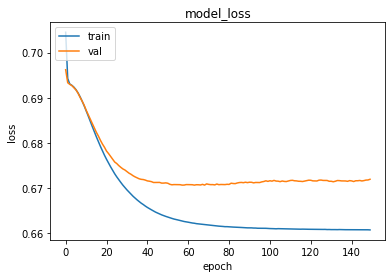

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'],loc = 'upper left')
plt.show()

In [ ]:
model.evaluate(
    x = (test_x[:,0,None], test_x[:,1,None], test_x[:,2,None], test_x[:,3,None]),
    y = test_y
)

 3/25 [==>...........................] - ETA: 0s - loss: 0.6787 - binary_accuracy: 0.5368

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


25/25 [==============================] - 1s 32ms/step - loss: 0.6705 - binary_accuracy: 0.5838


[0.6704768538475037, 0.5838281512260437]